### Analisando as notas em geral

In [2]:
# Importando dados
import pandas as pd

In [3]:
# Carregando dados
notas = pd.read_csv('data/ratings.csv')

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Tamanho do dataframe
notas.shape

(100836, 4)

In [5]:
# Renomeando colunas
notas.columns = ['usuario_id', 'filme_id','nota','momento']
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Valores únicos
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
# Contar os valores unicos
notas.nota.value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [8]:
#Media de uma series
notas.nota.mean()

3.501556983616962

<Axes: ylabel='Frequency'>

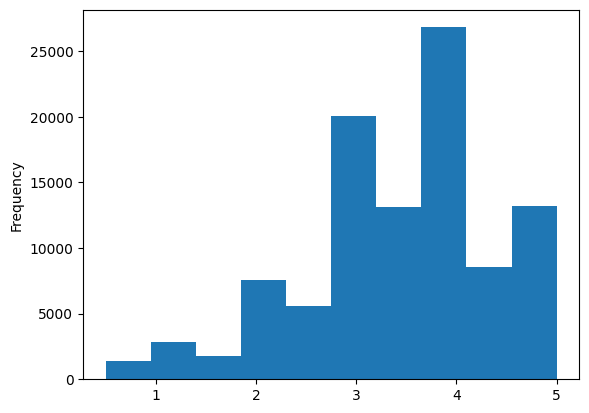

In [9]:
notas.nota.plot(kind='hist')

In [10]:
# Análise estatistica
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns

movie = pd.read_csv('data/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# Renomeando colunas
movie.columns = ['filme_id','titulo','genero']
movie.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Analisando notas de filmes especificos

### Trabalhando com Querys

In [13]:
# Faz um filtro dos filmes com id 1
notas.query("filme_id == 1").nota.mean()

3.9209302325581397

In [14]:
# Agrupamento de dados
medias_por_filme = notas.groupby('filme_id')['nota'].mean().reset_index()

medias_por_filme

,filme_id,nota
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


<Axes: ylabel='Frequency'>

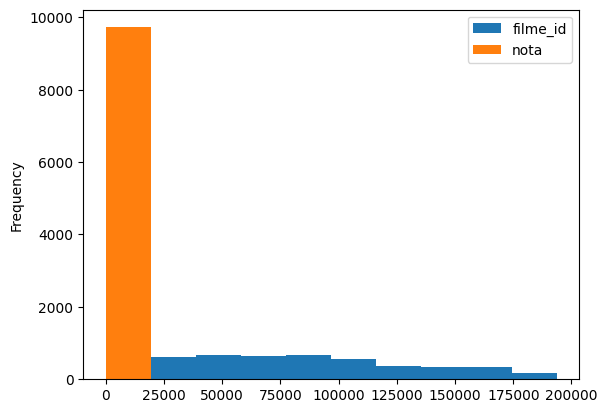

In [15]:
medias_por_filme.plot(kind='hist')

<Axes: xlabel='nota'>

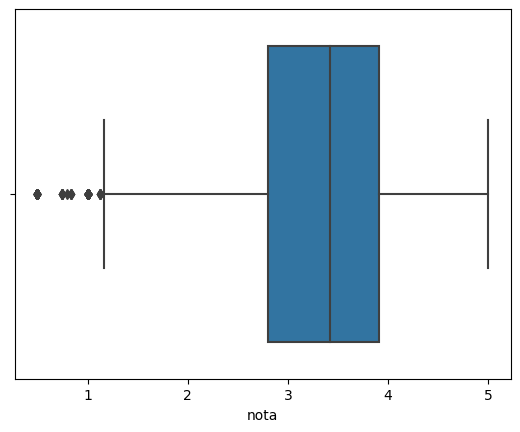

In [16]:
sns.boxplot(x='nota',data=medias_por_filme)

In [17]:
medias_por_filme.describe()

,filme_id,nota
count,9724.000000,9724.000000
mean,42245.024373,3.262448
std,52191.137320,0.869874
min,1.000000,0.500000
25%,3245.500000,2.800000
50%,7300.000000,3.416667
75%,76739.250000,3.911765
max,193609.000000,5.000000


<Axes: xlabel='nota', ylabel='Count'>

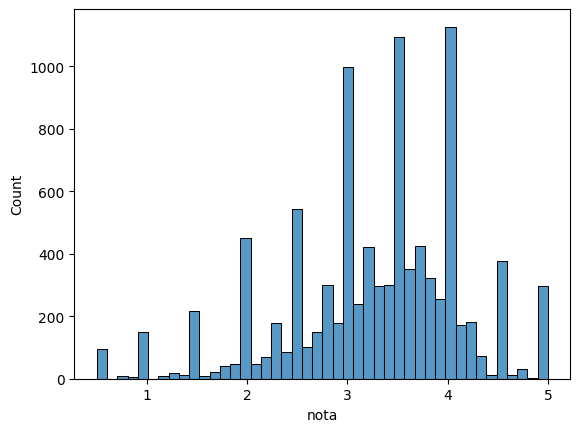

In [18]:
sns.histplot(x='nota',data=medias_por_filme)

In [19]:
#Carregando outra base de dados

dados = pd.read_csv('data/tmdb_5000_movies.csv')
dados.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Visualizando dados categoricos 

In [20]:
dados.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


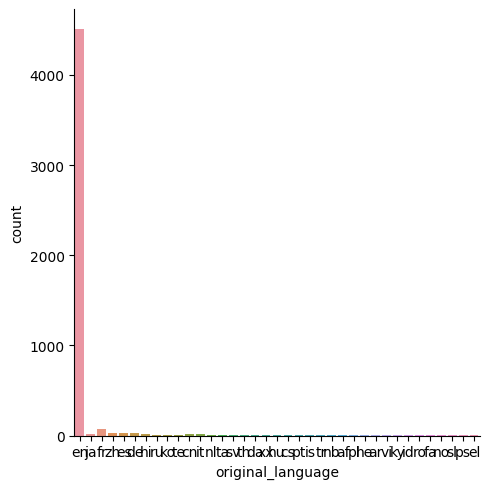

In [40]:
sns.catplot(data=dados, x='original_language', kind='count')

In [33]:
#Atribuir os dados a função value_counts: Além de fazer a contagem dos valores, vai ordenar do maior para o menor
todos_idiomas = dados.value_counts('original_language').to_frame().reset_index()

todos_idiomas.head()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='count'>

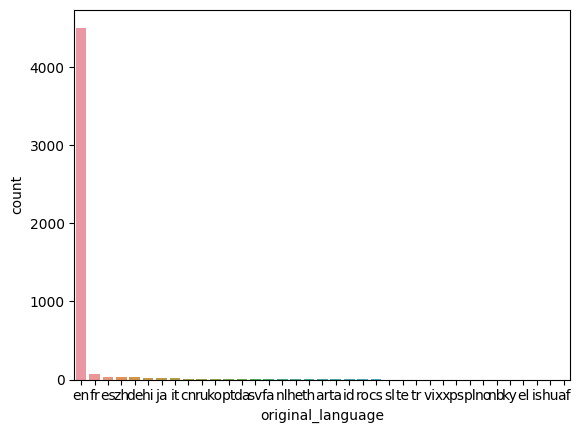

In [38]:
# Gerando um grafico mais organizado
sns.barplot(x='original_language', y='count',data=todos_idiomas)

Uma melhor forma de visualizar os nossos dados, é necessário fazer alguns ajustes, como por exemplo: Separar o quantitativo de ingles e o quantitativo das demais

In [45]:
l_ingles = dados.query("original_language == 'en'")

total_ingles = l_ingles.original_language.count()

total_ingles

4505

In [56]:
l_outras = dados.query("original_language != 'en'")

cont_l_outras = l_outras.value_counts('original_language').to_frame().reset_index()

total_outras = cont_l_outras['count'].sum()
total_outras

298

In [65]:
df = {'idiomas':['Ingles', 'Outras'], 'contagem':[total_ingles, total_outras]}


df = pd.DataFrame(df)
df


,idiomas,contagem
0,Ingles,4505
1,Outras,298


<Axes: title={'center': 'Filmes com idioma em Ingles X outros Idiomas'}, xlabel='idiomas', ylabel='contagem'>

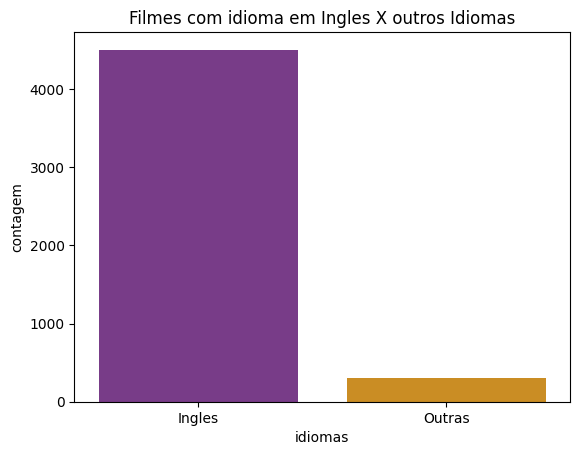

In [91]:
import matplotlib.pyplot as plt

# Para visualizar a prenominancia dos filmes com idioma em ingles em relação aos outros idiomas
plt.title('Filmes com idioma em Ingles X outros Idiomas')
sns.barplot(x='idiomas', y='contagem', data=df, palette='CMRmap')

Agora vamos ver qual a predominancia das demais linguas

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


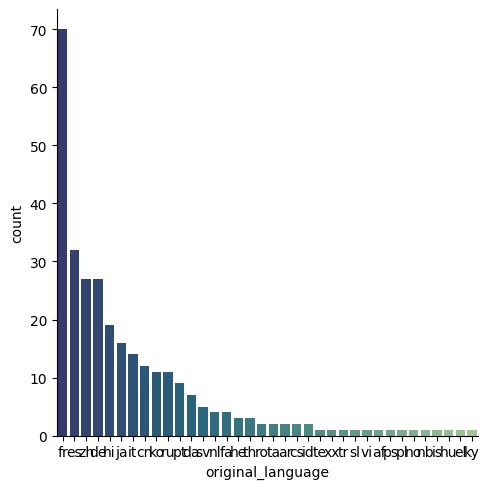

In [85]:
cont_l_outras.head()
sns.catplot(x='original_language', y='count', data=cont_l_outras, kind='bar', palette='crest_r')